<a href="https://colab.research.google.com/drive/1oVP0C0S6P7aVVN8sQ_O9hEI3eKz52uek?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental and Synthetic data


## Preparation

### Import libraries

#### If in Colab uncomment and run for the first time only

In [1]:
#%pip install latexify-py #run if in Colab for the first time only
#if % not working, use ! instead

In [2]:
#%pip install xlsxwriter #run if in Colab for the first time only

In [3]:
#%pip install fitter  #run if in Colab for the first time only 
#to choose the best distribution

In [4]:
#%pip install scipy # install SciPy #run if in Colab for the first time only 

#### Run every time you open this notbook locally or in Colab

In [6]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
from numpy import array, std, mean, sqrt

import fitter


import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower


import scipy as sp
from scipy.stats import levene,  shapiro, kstest, normaltest, chi2_contingency, kruskal, mannwhitneyu, ttest_ind, ttest_rel, f_oneway, wilcoxon, friedmanchisquare, pearsonr, spearmanr
from scipy.optimize import curve_fit
from scipy.special import boxcox, inv_boxcox

import statsmodels.api as sm
import pingouin as pg

import latexify
import xlsxwriter

import seaborn as sns
from statannotations.Annotator import Annotator

import matplotlib.pyplot as plt
import matplotlib.cm
import plotly.express as px
import plotly.graph_objects as go


from sklearn import datasets #to show an example
#from sklearn.cluster import KMeans
#from sklearn.linear_model import LinearRegression, Ridge
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.activations import relu,linear
#from tensorflow.keras.losses import SparseCategoricalCrossentropy
#from tensorflow.keras.optimizers import Adam

#import logging
#logging.getLogger("tensorflow").setLevel(logging.ERROR)

ImportError: cannot import name 'SparseDtype' from 'pandas.core.dtypes.dtypes' (/Users/vschastlivaia/miniforge3/envs/data-analysis/lib/python3.11/site-packages/pandas/core/dtypes/dtypes.py)

#### If in Colab upload custom_functions.py to be able to use it

In [ ]:
import custom_functions #if in Colab upload custom_functions.py to be able to use it

If you would like to use Prism colors, use color pallet colors_prism_hex:

In [ ]:
import matplotlib.colors as mcolors

colors_prism = ['rgb(95, 70, 144)',
                'rgb(29, 105, 150)',
                'rgb(56, 166, 165)',
                'rgb(15, 133, 84)',
                'rgb(115, 175, 72)',
                'rgb(237, 173, 8)',
                'rgb(225, 124, 5)',
                'rgb(204, 80, 62)',
                'rgb(148, 52, 110)',
                'rgb(111, 64, 112)',
                'rgb(102, 102, 102)']
colors_prism_hex = np.zeros(len(colors_prism), dtype=object)

for i in range(len(colors_prism)):
    color_tuple = eval(colors_prism[i][3:])
    color_rgb = tuple(value/255 for value in color_tuple)
    colors_prism_hex[i] = mcolors.to_hex(color_rgb)

print(colors_prism_hex)


['#5f4690' '#1d6996' '#38a6a5' '#0f8554' '#73af48' '#edad08' '#e17c05'
 '#cc503e' '#94346e' '#6f4070' '#666666']


### Import your data

If in Google colab, you upload data from your computer or mount your google drive

In [107]:
#open the uploaded file
#data_example = pd.read_excel('RFU values.xlsx', sheet_name='Sheet1', header=[0,1], index_col=0)

In [108]:
#from google.colab import drive
#drive.mount('/content/drive')

If you work locally, move data your file to the the repository folder to be able to open it fast

Then uncomment the code below

In [109]:
#open the uploaded file located IN THE SAME FOLDER as the code
#data_example = pd.read_excel('RFU values.xlsx', sheet_name='Sheet1', header=[0,1], index_col=0)

or specify the path to your file

In [110]:
# parent_dir is a parent directory to our current directory `cwd`
parent_dir = Path.cwd().parent

# relative_path is a relative path to the directory where our data is stored
relative_path = 'Data/'

# filename_example is the name of the file we want to read
filename_example = 'RFU values.xlsx'

filename_example_full = (parent_dir / relative_path / filename_example).resolve()


Importing file from Excel or csv

In [111]:
# if importing Excel file from local drive specifying its path
data_example = pd.read_excel(filename_example_full, sheet_name='Sheet1', header=[0,1], index_col=0)

#data_exaple = pd.read_csv('/full/path/to/file.csv', sep=';') #if importing CSV file


Importing public dataset from a library

In [112]:
#filename_survey = "annual_CDC_survey_data_250k_adults_related_to_their_health_status.xlsx"
#demo_dataset = pd.read_excel(file_name, sheet_name='heart_2020')
diabetes = datasets.load_diabetes(as_frame=True, scaled=False)

#data = diabetes.data
#target = diabetes.target
#feature_names = diabetes.feature_names 

demo_dataset = diabetes.frame

[Diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

The original [puplication](https://hastie.su.domains/Papers/LARS/LeastAngle_2002.pdf)

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Columns:
|Feature | Description |
|--------|-------------|
|age     |age in years|
|sex    | male, female |
|bmi | body mass index |
|bp | average blood pressure|
|s1 |tc, total serum cholesterol|
|s2 |ldl, low-density lipoproteins|
|s3 |hdl, high-density lipoproteins|
|s4 |tch, total cholesterol / HDL|
|s5 |ltg, possibly log of serum triglycerides level|
|s6 |glu, blood sugar level|
|Target| Column 11 is a quantitative measure of disease progression one year after baseline|

Original [source](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

## Data exploration

Have a look at what has been imported (optional)

In [113]:
demo_dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


Make an array of the feature names from your columns 

(e.g. treated vs untreated, human vs model, different organs or tissues etc.)

In our case: age, sex, body mass index, blood pressure, etc.

In [114]:
feature_names = np.array(demo_dataset.columns)
feature_names

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'], dtype=object)

### Descriptive statistics

#### Sample size, mean, standard deviation

The cell below make simple arithmetics for each feature

In [115]:
custom_functions.describe_data(demo_dataset)

The dataset contains 11 columns and 442 rows

Column: age (float64)
--- Summary statistics:
 count    442.000000
mean      48.518100
std       13.109028
min       19.000000
25%       38.250000
50%       50.000000
75%       59.000000
max       79.000000
Name: age, dtype: float64

Column: sex (float64)
--- Summary statistics:
 count    442.000000
mean       1.468326
std        0.499561
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: sex, dtype: float64

Column: bmi (float64)
--- Summary statistics:
 count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: bmi, dtype: float64

Column: bp (float64)
--- Summary statistics:
 count    442.000000
mean      94.647014
std       13.831283
min       62.000000
25%       84.000000
50%       93.000000
75%      105.000000
max      133.000000
Name: bp, dtype: float64

Column: s1 (float64)

### Explore the data with some plots



#### Error bar plot

Text(0.5, 1.0, 'BMI vs Age')

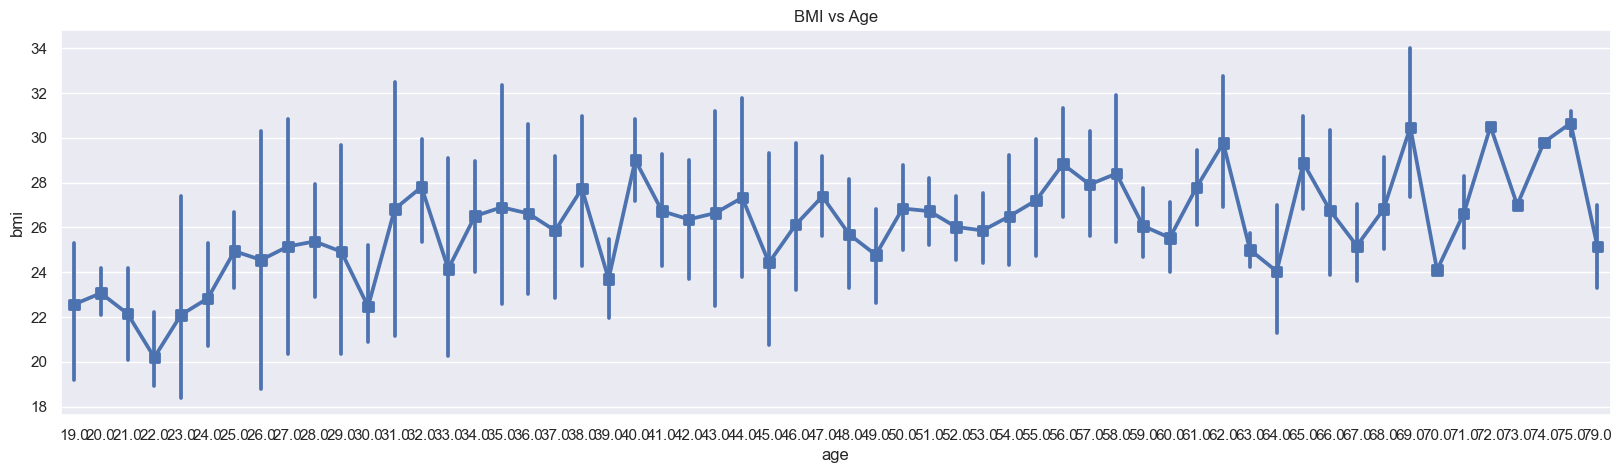

In [116]:
sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(20,5)})

#sns.set_context("poster") #to use for poster illustrations
figure_1 = sns.pointplot(x=demo_dataset['age'],
              y = demo_dataset['bmi'],
              #hue = demo_dataset['sex'],
              errorbar = 'sd', # 'ci'is confidence interval, other options: 'sd', 'range'
              markers = 's') #if not specified markers are dots
figure_1.set_title('BMI vs Age')              


In [120]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")


In [121]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


OptionError: No such keys(s): 'mode.use_inf_as_null'

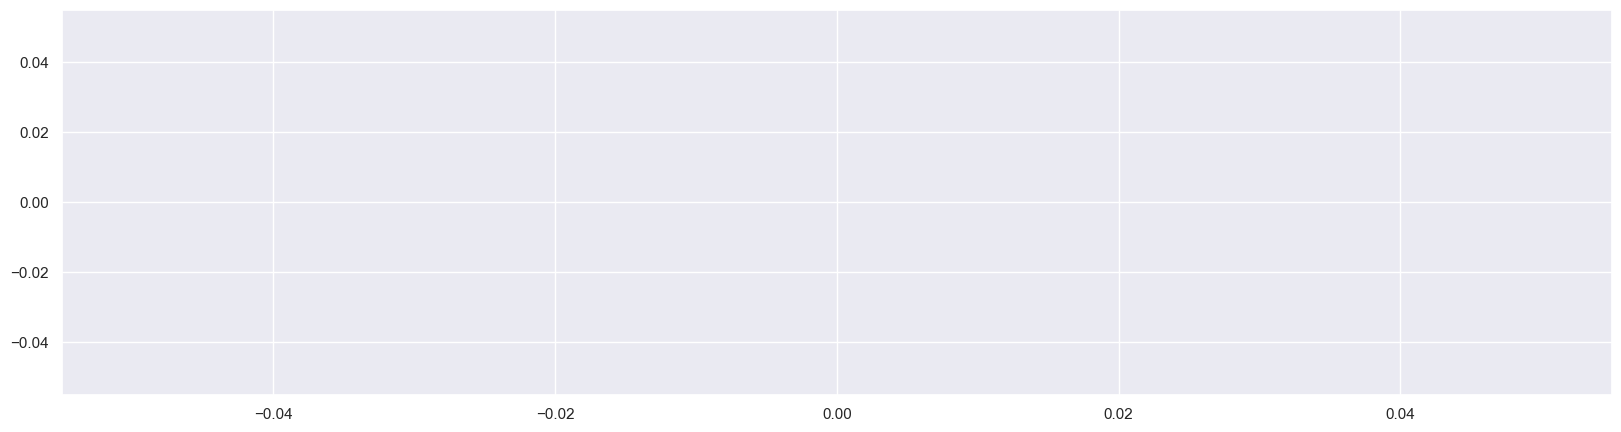

In [126]:
flights = sns.load_dataset("flights")
sns.lineplot(data=flights, x="year", y="passengers")

OptionError: No such keys(s): 'mode.use_inf_as_null'

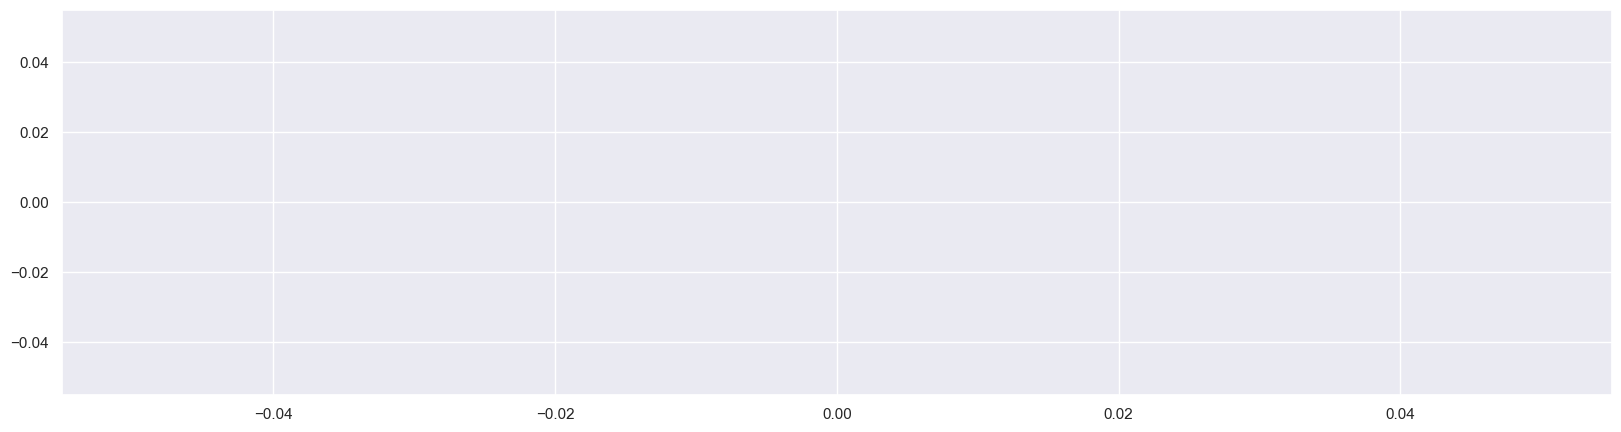

In [125]:
# Plot the responses for different events and regions
sns.lineplot(data=fmri, 
             x="timepoint", y="signal",
             hue="event", style="event",
             markers=True, dashes=False
             )

#### Violin plot (if more that 3 data point)
to see means, quantiles and develop intuition about difference btw samples (e.g. who had stroke and who had not)

Selecting only numerical columns

In [ ]:
numeric_features = demo_dataset.select_dtypes(include=['float', 'int']).columns 
print(numeric_features)


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


In [ ]:
#this loop goes through all features and display a violin plot for each numeric feature

for i, col in enumerate(numeric_features):
  violin_plot = go.Figure()
  violin_plot.add_trace(go.Violin(x=demo_dataset['sex'],
                           y=demo_dataset[col],
                           line_color=px.colors.qualitative.Prism[i], #that's the colorcode for the line
                           name=col,
                           points='all', #option to show all points
                           pointpos=0))
  
  violin_plot.update_layout(violinmode='group', 
                            title_text=col, 
                            xaxis_title='sex', 
                            yaxis_title=col)
  violin_plot.show()

#### Histogam (the more datapoint the better)
to have a look at the distribution (looks better with more samples)

In [ ]:
for i in numeric_features:
  fig = px.histogram(
      demo_dataset,
      x=i,
      marginal='box', # or violin, rug
      #nbins=50,
      title = i)
  fig.show()

### Distribution fitting
We will fit the best distribution and check stat assumptions for statisticak tests:

normality and homoscedasticity

#### Example on generated data

In [ ]:
from scipy import stats
synthetic_data = stats.gamma.rvs(3, loc=1.5, scale=2, size=1000)

In [ ]:
#the list of all distributions avalible for test
from fitter import get_distributions
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3'

In [ ]:
#get sub set of common distributions
from fitter import get_common_distributions
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.012430,894.980457,-11274.663065,inf,0.016262,9.501692e-01
gamma,0.013878,919.459087,-11164.459395,inf,0.025417,5.296300e-01
chi2,0.013878,919.461020,-11164.458072,inf,0.025414,5.297832e-01
rayleigh,0.022988,1056.580341,-10666.743925,inf,0.072441,5.219854e-05
cauchy,0.041073,891.344145,-10086.346448,inf,0.120562,4.004060e-13


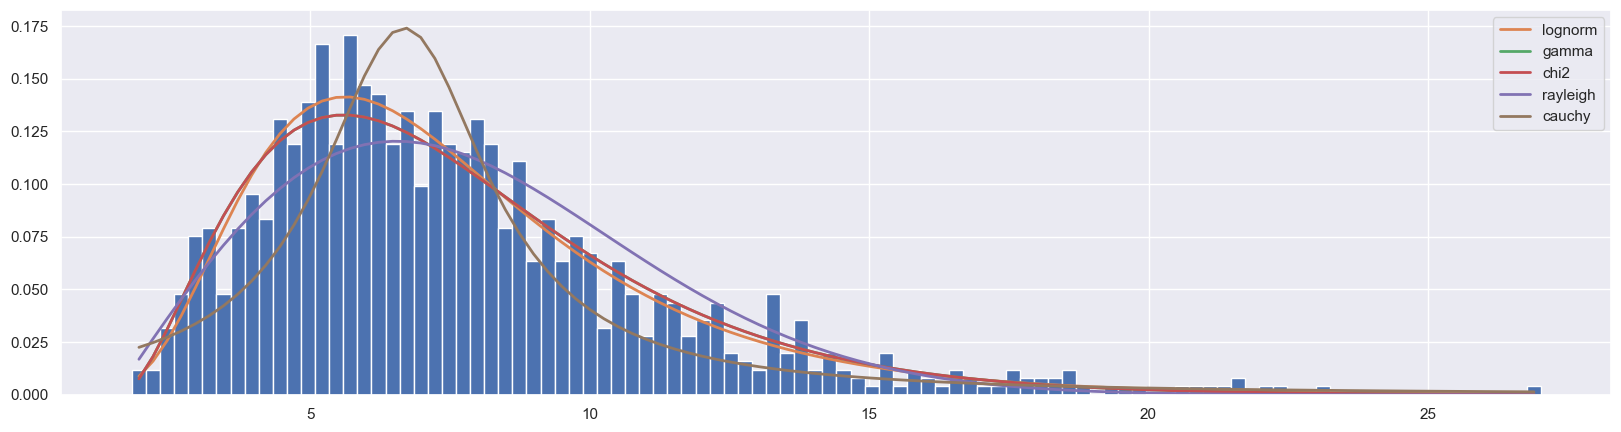

In [ ]:
import fitter
f = fitter.Fitter(synthetic_data)

# just a trick to use only 10 distributions instead of 80 to speed up the fitting
#f.distributions = f.distributions[0:10] + ['gamma']

# another trick to use only common distributions instead of 80 to speed up the fitting
f.distributions = get_common_distributions()

# fit and plot
f.fit()
f.summary()
# may take some time since by default

Output the best fitted distribution and its parameters

In [ ]:
#Return best fitted distribution and its parameters
#a dictionary with one key (the distribution name) and its parameters

f.get_best(method='sumsquare_error')

{'lognorm': {'s': 0.45278012192305545,
  'loc': 0.004493478416633223,
  'scale': 6.904186606892264}}

#### Find distribution of our demo data

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,0.046769,756.221447,-4027.728642,inf,0.031104,0.773744
gamma,0.046769,756.221962,-4027.728553,inf,0.031105,0.773727
rayleigh,0.047045,754.605613,-4031.212093,inf,0.031313,0.766766
lognorm,0.047109,758.133075,-4024.524984,inf,0.034148,0.668168
norm,0.056175,806.481454,-3952.820935,inf,0.070129,0.024628


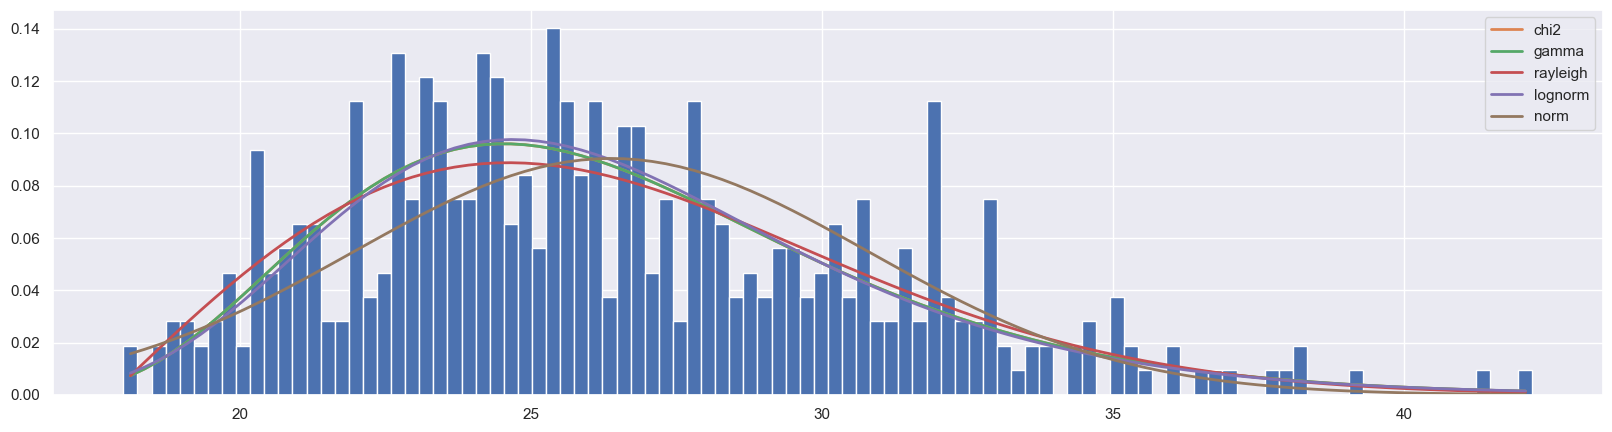

In [ ]:
fit_demo = fitter.Fitter(demo_dataset['bmi'],
                  distributions = get_common_distributions())

# we'll use only common distributions instead of 80 to speed up the fitting


# fit and plot
fit_demo.fit()
fit_demo.summary()
# may take some time


In [ ]:
fit_demo.get_best(method='sumsquare_error')

{'chi2': {'df': 11.802065044336917,
  'loc': 15.486849885505247,
  'scale': 0.9226306000168507}}

In [ ]:
mean_BMI, std_BMI = fit_demo.fitted_param['norm']

print('estimated mean:', mean_BMI)
print('estimated standard deviation:', std_BMI)

estimated mean: 26.37579185520362
estimated standard deviation: 4.413120855492464


### Test for normality (Shapiro-Wilk test)

For sample size <50

The Null hypothesis that the data are normally distributed (mean = 0, standard deviation = 1)

If the p-value is less than 5%, then the distribution in question is significantly different from a normal distribution

In [ ]:
# Shapiro-Wilk test for normality
statistic_gamma, p_value_gamma = shapiro(synthetic_data)

# the result
print("Shapiro-Wilk test statistic:", statistic_gamma)
print("If p-value is less than 0.05, we reject normality:", p_value_gamma)


Shapiro-Wilk test statistic: 0.9083824157714844
If p-value is less than 0.05, we reject normality: 4.781695759784815e-24


### Test for normality (Lilliefors test)

The Null hypothesis that the data are sampled from a Gaussian distribution (mean and standard deviation can be any).

If the p-value is less than 5%, we reject the hypothesis that the data are normally distributed.

In [ ]:
statistics_BMI, p_value_BMI = sm.stats.lilliefors(demo_dataset['bmi'])

print("Lilliefors test statistic:", statistics_BMI)
print("If p-value is less than 0.05, we reject normality:", p_value_BMI)

Lilliefors test statistic: 0.0700910293984166
If p-value is less than 0.05, we reject normality: 0.0009999999999998899


In [ ]:
x = np.random.normal(mean_BMI, std_BMI, 10000)
res_norm, p_norm = sm.stats.lilliefors(x)


print("If p-value is more than 0.05, we assume normality:", p_norm)

If p-value is more than 0.05, we assume normality: 0.12959267576666875


### Test for homoscedactisity

The [Levene test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene) tests the null hypothesis that all input samples are from populations with equal variances. Works even with non-normally distributed data

In [ ]:
# Perform Levene's test for homoscedasticity
statistic, p_value = levene(demo_dataset['bmi'][demo_dataset['sex'] == 1], 
                            demo_dataset['bmi'][demo_dataset['sex'] == 2], 
                            center='median') #Recommended for skewed (non-normal) distributions

# Print the test statistic and p-value
print("Levene's test statistic:", statistic) #The value of the statistic tends to be high when there is a large difference in variances
print("If the p-value is less than 0.05, the variances are not equal. P-value:", p_value) #if the p-value is less than 0.05, the variances are not equal


Levene's test statistic: 5.22788075275066
If the p-value is less than 0.05, the variances are not equal. P-value: 0.02270192314936169


## Data preprocessing (normalization)

| Distribution| Transformation | Example |
|----------|----------|----------|
|   Normal  |   nothing  | 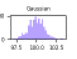 |
|   Lognormal  |   $\ln(variable)$ or The Box-Cox transformation |  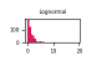 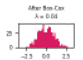  |
|   Gamma  |  $\sqrt[3]{variable}$  |   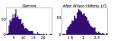  |
|   Chi2  |  The Box-Cox transfromation  |   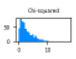 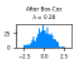  |
|   Exponential, Weibull |  The Box-Cox transfromation  |   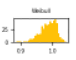 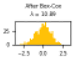 |
|   Cauchy |  Pretend you didn't see it |  No exact mean. Extreme events, such as annual maximum one-day rainfalls and river discharges, value-at-risk in finance |


### The Box-Cox transformation

$$
y = \begin{cases}
\frac{x^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(x) & \text{if } \lambda = 0 \\
\end{cases}
$$
  

In [ ]:
demo_dataset['BMI_transformed'] = boxcox(demo_dataset['bmi'], 0) #lambda varies from -5 to 5

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
chi2,32.143224,57.018213,-1140.255898,inf,0.034842,0.643555
gamma,32.143492,57.020132,-1140.252218,inf,0.034835,0.643823
lognorm,32.220295,57.705368,-1139.197371,inf,0.035103,0.634295
norm,33.337824,63.428437,-1130.218209,inf,0.038057,0.531342
exponpow,34.300517,57.936758,-1111.544135,inf,0.047127,0.271414


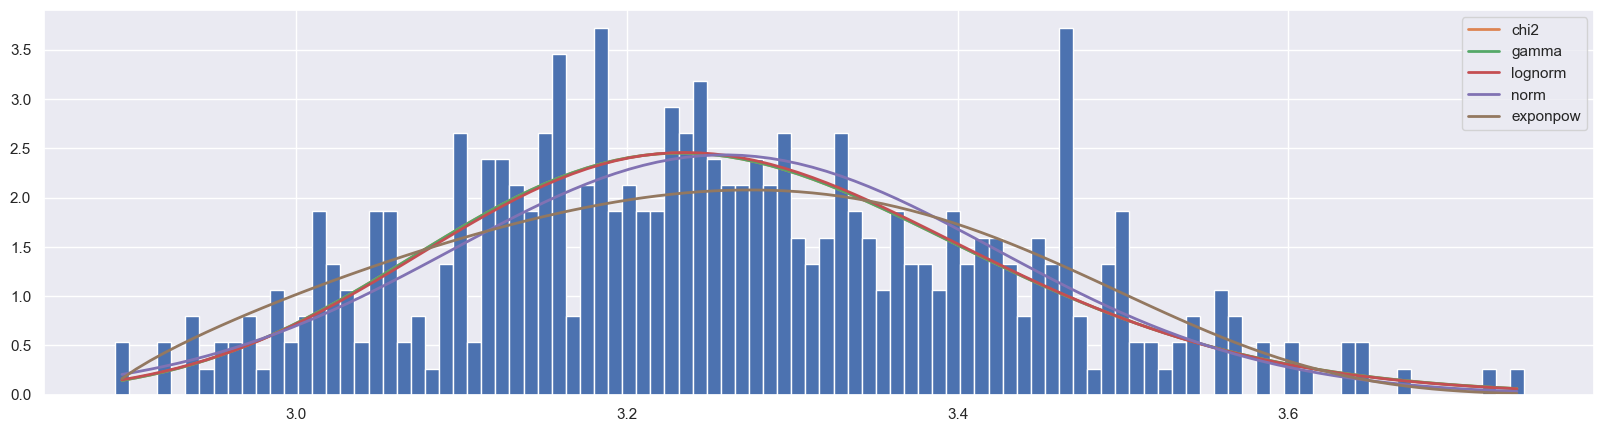

In [ ]:
fit_BMI_transformed = fitter.Fitter(demo_dataset['BMI_transformed'],
                    distributions = get_common_distributions())

# fit and plot
fit_BMI_transformed.fit()
fit_BMI_transformed.summary()
# may take some time

In [ ]:
res_tr, p_tr = sm.stats.lilliefors(demo_dataset['BMI_transformed'])

print("If p-value is less than 0.05, we reject normality:", p_tr)

If p-value is less than 0.05, we reject normality: 0.15673072456618642


In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=demo_dataset['bmi'], 
                           name='BMI'), 
              row=1, col=1)

fig.add_trace(go.Histogram(x=demo_dataset['BMI_transformed'], 
                           name='BMI Transformed'), 
              row=1, col=2)

fig.update_layout(title='Histogram of BMI and Transformed BMI',
                  xaxis_title='BMI',
                  yaxis_title='Count')

fig.show()


### Cubic root transform

In [ ]:

# on generated data that follows a gamma distribution
cubic_root_transformed = np.cbrt(synthetic_data)


In [ ]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=synthetic_data, 
                           name='Gamma'), 
              row=1, col=1)

fig.add_trace(go.Histogram(x=cubic_root_transformed, 
                           name='Gamma Transformed'), 
              row=1, col=2)

fig.update_layout(title='Histogram of Gamma and Transformed Gamma',
                  xaxis_title='X',
                  yaxis_title='Count')

fig.show()

Test for normality

In [ ]:
res_g, p_g = sm.stats.lilliefors(cubic_root_transformed)

print("If p-value is less than 0.05, we reject normality:", p_g)

If p-value is less than 0.05, we reject normality: 0.003407419502775459


## Hypotesis testing

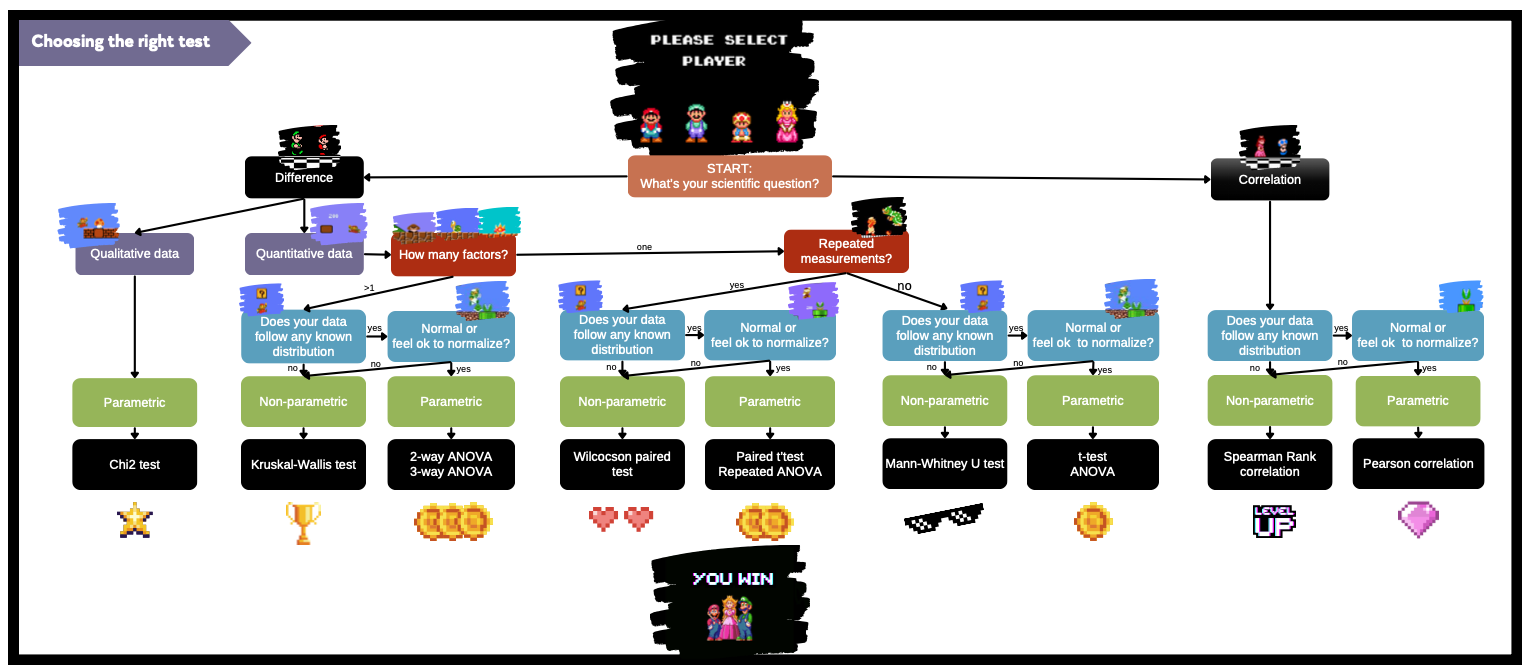

### Chi2 test

In [ ]:
# contingency table
contingency_table = pd.crosstab(demo_dataset['sex'], demo_dataset['target'])

# the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# result
print("Chi-square test statistic:", chi2)
print("If p-value is less than 0.05, the variables are dependent. P-value:", p_value) 

#print("Degrees of freedom:", dof)
#print("Expected frequencies:", expected)


Chi-square test statistic: 221.71599547743858
If p-value is less than 0.05, the variables are dependent. P-value: 0.32676499135018905


### Kruskai-Wallis test

H0: there is no difference between the groups

If p-value less than 0.05, then there is at least two groups that differ

In [ ]:
#Create age groups for group comparison
demo_dataset['age group'] = pd.cut(demo_dataset['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71-100'])
print('We created groups based on age:', demo_dataset['age group'].unique())

We created groups based on age: ['51-70', '31-50', '71-100', '0-30']
Categories (4, object): ['0-30' < '31-50' < '51-70' < '71-100']


In [ ]:
# Kruskal-Wallis test
kw_results = pg.kruskal(demo_dataset, dv='target', between='age group') #NB create age groups

# Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print(kw_results)

Kruskal-Wallis Test Results:
            Source  ddof1          H     p-unc
Kruskal  age group      3  17.820688  0.000479


When p-value is less than 0.05, we have at least a pair of groups that differ between each other. 

Let's find them by running pairwise t-test corrercted for multiple comparison

Choose pairs for wich newly calculated p-value (pval column) is less the 0.05

In [ ]:

# post-hoc pairwise comparisons
posthoc_results = pg.pairwise_gameshowell(demo_dataset, dv='target', between='age group') #NB create age groups


# post-hoc pairwise comparison results
print("\nPost-Hoc Pairwise Comparison Results:")
print(posthoc_results)




Post-Hoc Pairwise Comparison Results:
       A       B     mean(A)     mean(B)       diff         se         T  \
0   0-30   31-50  128.468085  139.705556 -11.237470  11.027943 -1.019000   
1   0-30   51-70  128.468085  167.822660 -39.354575  10.990245 -3.580864   
2   0-30  71-100  128.468085  165.833333 -37.365248  18.622267 -2.006482   
3  31-50   51-70  139.705556  167.822660 -28.117105   7.908577 -3.555267   
4  31-50  71-100  139.705556  165.833333 -26.127778  16.986728 -1.538129   
5  51-70  71-100  167.822660  165.833333   1.989327  16.962278  0.117279   

           df      pval    hedges  
0   81.528179  0.738827 -0.152387  
1   80.818126  0.003211 -0.511400  
2   19.479584  0.219663 -0.582568  
3  378.937644  0.002394 -0.362249  
4   13.868482  0.442758 -0.349266  
5   13.790865  0.999394  0.025381  


Filter pairs that show the difference (for wich newly calculated p-value (pval column) is less the 0.05)

In [ ]:
# Filtering for pairs with a significant difference
significant_pairs = posthoc_results[posthoc_results['pval'] < 0.05]

# Print the significant pairs
print("Pairs with a significant difference:")
print(significant_pairs)
print('Number of pairs:', len(significant_pairs))

Pairs with a significant difference:
       A      B     mean(A)    mean(B)       diff         se         T  \
1   0-30  51-70  128.468085  167.82266 -39.354575  10.990245 -3.580864   
3  31-50  51-70  139.705556  167.82266 -28.117105   7.908577 -3.555267   

           df      pval    hedges  
1   80.818126  0.003211 -0.511400  
3  378.937644  0.002394 -0.362249  
Number of pairs: 2


### Ploting the results of the comparison

First we need obtain the liest of compared pairs

In [ ]:
all_pairs = posthoc_results[['A', 'B']].values.tolist()
print(all_pairs)
print(len(all_pairs))

[['0-30', '31-50'], ['0-30', '51-70'], ['0-30', '71-100'], ['31-50', '51-70'], ['31-50', '71-100'], ['51-70', '71-100']]
6


And then plot the group with annotation (note that comparison is performed while plotting inside the "Annotate" method)

In [ ]:
# ignore the warnings, the statannotate python package owners need to update it according to the new pandas version
import warnings
warnings.simplefilter('ignore', category =FutureWarning)


0-30 vs. 31-50: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=4.125e-01
31-50 vs. 51-70: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:2.485e-03 Stat=1.247e+01
51-70 vs. 71-100: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=4.157e-03
0-30 vs. 51-70: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.368e-02 Stat=9.310e+00
31-50 vs. 71-100: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:7.260e-01 Stat=2.404e+00
0-30 vs. 71-100: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:3.143e-01 Stat=3.763e+00


/var/folders/q6/lfkm7xkn3h11bnq166v52624wtdt_h/T/ipykernel_80421/4103424610.py:22: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



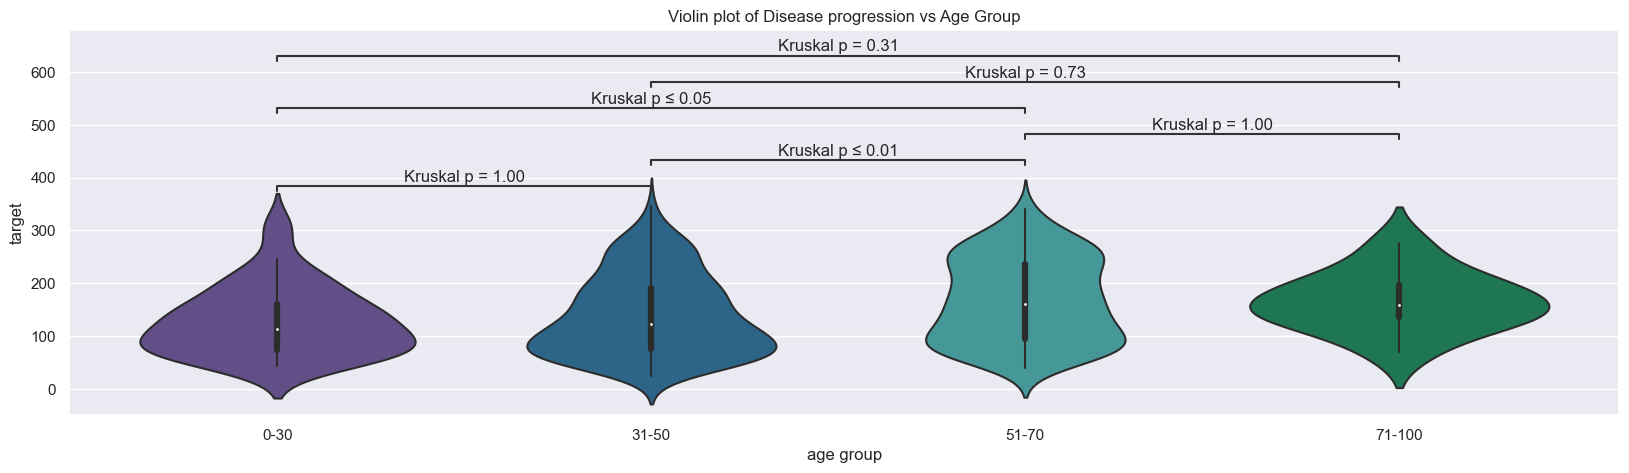

In [ ]:
groups_compared_violin = plt.figure()

ax = sns.violinplot(data=demo_dataset, 
                 x='age group', 
                 y='target', 
                 figsize=(10, 10), 
                 palette=colors_prism_hex
                 )  # set the figsize 
ax.set_title('Violin plot of Disease progression vs Age Group')

annotator = Annotator(ax, 
                      all_pairs, 
                      data=demo_dataset, 
                      x='age group', 
                      y='target')
annotator.configure(test='Kruskal', #Kruskal-Wallis test using Bonferroni correction
                    comparisons_correction="Bonferroni", 
                    text_format='simple', #other options: 'star', 'full'
                    loc='inside') 
test_results = annotator.apply_and_annotate()

groups_compared_violin.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0-30 vs. 31-50: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=4.125e-01
31-50 vs. 51-70: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:2.485e-03 Stat=1.247e+01
51-70 vs. 71-100: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.000e+00 Stat=4.157e-03
0-30 vs. 51-70: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:1.368e-02 Stat=9.310e+00
31-50 vs. 71-100: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:7.260e-01 Stat=2.404e+00
0-30 vs. 71-100: Kruskal-Wallis independent samples (pairwise between groups) with Bonferroni correction, P_val:3.143e-01 Stat=3.763e+

/var/folders/q6/lfkm7xkn3h11bnq166v52624wtdt_h/T/ipykernel_80421/400590078.py:21: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



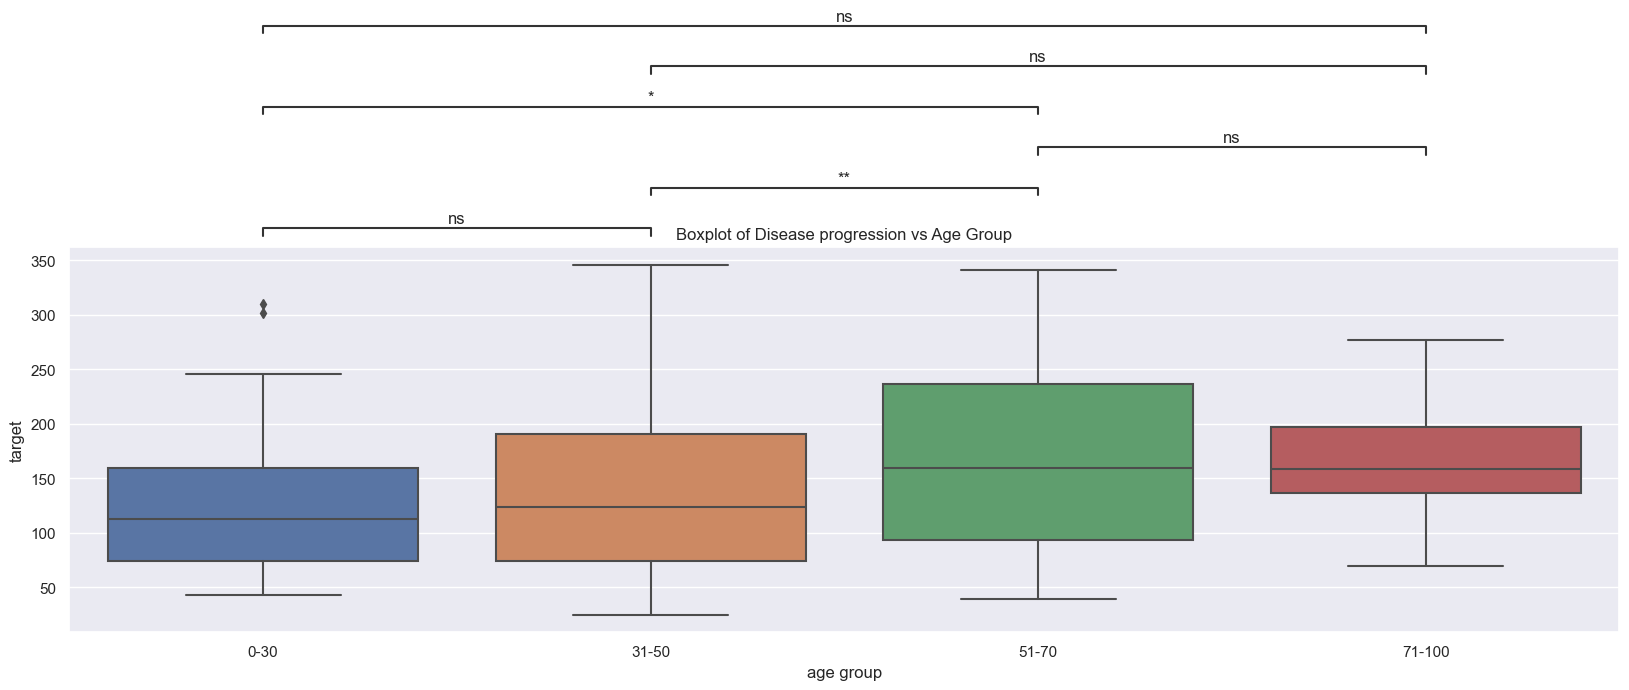

In [ ]:
groups_compared_box = plt.figure()

ax = sns.boxplot(data=demo_dataset, 
                 x='age group', 
                 y='target')
ax.set_title('Boxplot of Disease progression vs Age Group')

annotator = Annotator(ax, 
                      all_pairs, 
                      data=demo_dataset, 
                      x='age group', 
                      y='target')

annotator.configure(test='Kruskal', #Kruskal-Wallis test using Bonferroni correction
                    comparisons_correction="Bonferroni", 
                    text_format='star', #other options: 'full', 'simple'
                    loc='outside') 

test_results = annotator.apply_and_annotate()

groups_compared_box.show()

In [ ]:
groups_compared_violin.savefig("Group comparison {}.png".format('age group'), bbox_inches='tight')

### ANOVA test

In [ ]:
# ANOVA test
group1 = demo_dataset[demo_dataset['age group'] == 'Yes']['bmi'] #NB change to age groups
group2 = demo_dataset[demo_dataset['age group'] == 'No']['bmi'] #NB change to age groups
f_statistic, p_value = f_oneway(group1, group2)

# ANOVA results
print("F-statistic:", f_statistic)
print("p-value:", p_value)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# test
tukey_results = pairwise_tukeyhsd(demo_dataset['bmi'], demo_dataset['Diabetic']) #NB create age groups

# test results
print("Tukey's HSD Test Results:")
print(tukey_results)


### Mann-Whitney U test

In [ ]:
# Mann-Whitney U test
group1 = demo_dataset[demo_dataset['sex'] == 1]['bmi']
group2 = demo_dataset[demo_dataset['sex'] == 2]['bmi']
statistic, p_value = mannwhitneyu(group1, group2)

print("Mann-Whitney U test conditioned by sex")
print("Test statistic:", statistic)
print("If p-value is less than 0.05 then there is difference between the groups:", p_value)



Mann-Whitney U test conditioned by sex
Test statistic: 21562.5
If p-value is less than 0.05 then there is difference between the groups: 0.039465910197960315


### T-test


In [ ]:
# Define two groups of data

# Perform the T-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -1.8565180114433686
P-value: 0.06404795642083816


### Wilcocson paired test

In [ ]:
sample1 = group1
sample2 = group1*1.1
# the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sample1, sample2)

# Print the results
print("Wilcoxon signed-rank test statistic:", statistic)
print("P-value:", p_value)


Wilcoxon signed-rank test statistic: 0.0
P-value: 2.640145037456189e-40


### Paried t-test

In [ ]:
# Perform the paired t-test
t_statistic, p_value = ttest_rel(sample1, sample2)

# Print the results
print("Paired t-test statistic:", t_statistic)
print("P-value:", p_value)


Paired t-test statistic: -87.22695723372627
P-value: 1.8629119229967315e-180


### Repeated ANOVA

In [ ]:
sample1 = sample1
sample2 = sample2
sample3 = sample1*2

# Perform the repeated measures ANOVA
statistic, p_value = friedmanchisquare(sample1, sample2, sample3)

# Print the results
print("Friedman chi-square statistic:", statistic)
print("P-value:", p_value)


Friedman chi-square statistic: 470.0
P-value: 8.725629185036948e-103


### Pearson corrlation

In [ ]:
#Pearson corrlation
correlation, p_value = pearsonr(demo_dataset['bmi'], demo_dataset['target'])


print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.5864501344746886
p-value: 3.466006445167354e-42


### Spearman correlation

In [ ]:
from scipy.stats import spearmanr

# Spearman correlation 
correlation, p_value = spearmanr(demo_dataset['bmi'], demo_dataset['target'])

print("Spearman correlation coefficient:", correlation)
print("p-value:", p_value)


Spearman correlation coefficient: 0.5613820101065616
p-value: 4.5670239277250324e-38


## Power analysis

Statistical Power calculations for a t-test for two independent sample

### Effect size can be measured by e.g. Cohen distance between the groups


| Effect size | d | Reference|
|----------|----------|----------|
|   Very small  |   0.01    |   [New Effect Size Rules of Thumb ](https://doi.org/10.22237%2Fjmasm%2F1257035100) |
|   Small  |   0.20 |   [Statistical Power Analysis for the Behavioral Sciences](https://books.google.com/books?id=2v9zDAsLvA0C&pg=PP1) |
|   Medium  |   0.50    |[Statistical Power Analysis for the Behavioral Sciences](https://books.google.com/books?id=2v9zDAsLvA0C&pg=PP1)|
|   Large 	|   0.80 	|[Statistical Power Analysis for the Behavioral Sciences](https://books.google.com/books?id=2v9zDAsLvA0C&pg=PP1)|
|   Very large 	|1.20 	|[New Effect Size Rules of Thumb ](https://doi.org/10.22237%2Fjmasm%2F1257035100)|
|Huge 	|2.0 	|[New Effect Size Rules of Thumb ](https://doi.org/10.22237%2Fjmasm%2F1257035100)|¶

We can compute a power analysis using functions from the statsmodels.stats.power package.



### Theory
The goal to determine a difference in the mean between two groups using an independent samples t-test.

Let’s calculate an effect size of Cohen’s d
$$ d = \frac {(M_2 - M_1)} {SD_{pooled}} $$
where $M_i$ is mean for an $i$-th sample,

and $SD_{pooled}$ is a pooled standard deviation $$SDpooled = \sqrt{\frac{(n_1 - 1) * SD_1^2 + (n_2 - 1) * SD_2^2} {n_1 + n_2 - 2}}$$  


Cohen’s D , or standardized mean difference, is one of the most common ways to measure effect size. An effect size is how large an effect is. For example, medication A has a larger effect than medication B. While a p-value can tell you if there is an effect, it won’t tell you how large that effect is.

Cohen’s D specifically measures the effect size of the difference between two means
### Examples
![Cohen's distance: source statisticshowto.com](https://scientificallysoundorg360.files.wordpress.com/2017/07/cohen_example-e1499923427851.png?w=860)

If in Colab uncomment the next cell to be able to calculate the cohen distance

In [ ]:
# def cohen_d(x,y):
#     #correct if the population S.D. is expected to be equal for the two groups.
#     nx = len(x)
#     ny = len(y)
#     dof = nx + ny - 2
#     return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)


Let's have a look at our data

In [ ]:
fig = px.histogram(
    demo_dataset,
    x='bmi',
    color='sex',
    nbins=100,
    barmode='overlay',
    histnorm='probability density',
    title = 'BMI distribution')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Violin(x = demo_dataset['sex'][ demo_dataset['s1'] > 180 ],
                        y = demo_dataset['bmi'][ demo_dataset['s1'] <= 180 ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x = demo_dataset['sex'][ demo_dataset['s1'] > 180 ],
                        y = demo_dataset['bmi'][ demo_dataset['s1'] <= 180 ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='positive',
                        line_color='orange')
             )
fig.update_traces(meanline_visible=True,
                  #points='all',  # show all points
                  #jitter=0.05,  # add some jitter on points for better visibility
                  scalemode='count') #scale violin plot area with total count)
fig.update_layout(violingap=0.5, violinmode='overlay',
                  title_text='BMI distribution by s1')
fig.show()

Calculate the Cohen distanse between the groups

In [ ]:
group_distance = custom_functions.cohen_d(demo_dataset.loc[demo_dataset['Stroke'] == 'Yes', 'BMI'], demo_dataset.loc[demo_dataset['Stroke'] == 'No', 'BMI'])

group_distance_female = custom_functions.cohen_d(demo_dataset.loc[(demo_dataset['Stroke'] == 'Yes') & (demo_dataset['Sex'] == 'Female'), 'BMI'], demo_dataset.loc[(demo_dataset['Stroke'] == 'No') & (demo_dataset['Sex'] == 'Female'), 'BMI'])
group_distance_male = custom_functions.cohen_d(demo_dataset.loc[(demo_dataset['Stroke'] == 'Yes') & (demo_dataset['Sex'] == 'Male'), 'BMI'], demo_dataset.loc[(demo_dataset['Stroke'] == 'No') & (demo_dataset['Sex'] == 'Male'), 'BMI'])

print('Cohen distance between the groups is', group_distance.round(2))
print('Cohen distance between the female groups is', group_distance_female.round(2))
print('Cohen distance between the male groups is', group_distance_male.round(2))

### Calculate the sample size

We wish to have 80% power to find the effect if it exists. We can compute the sample size needed for adequate power using the TTestIndPower() function:

In [ ]:
power_analysis = smp.TTestIndPower()
sample_size_female = power_analysis.solve_power(effect_size = group_distance_female, power=0.8, alpha=0.05)
sample_size_male = power_analysis.solve_power(effect_size = group_distance_male, power=0.8, alpha=0.05)

print("We need {size:.0f} obesrvations to detect difference in female population".format(size = sample_size_female))
print("We need {size:.0f} obesrvations to detect difference in male population".format(size = sample_size_male))

### General observations on power, sample size, and significance

A plot showing how many samples we need to achieve the desired power of the test with the given statistical significance $\alpha$. It's nice to have 80% power

In [ ]:
# parameters for power analysis
effect_sizes = array([0.10, 0.40, 0.60, 0.8])
sample_sizes = array(range(5, 100))
significance = 0.05 #change this number to play with significance level

# calculate power curves from multiple power analyses

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('Power of a test')
fig = power_analysis.plot_power(
    dep_var='nobs', #which variable is used for the horizontal axis
    nobs=sample_sizes, #number of observations
    effect_size=effect_sizes, #effect size
    alpha=significance, #significance level
    ax=ax, #reuse axis from plt
    title='Power of a t-test\n$\\alpha ={a}$ depending on sample size'.format(a = significance))

## Save what is needed

In [ ]:
## save to xlsx file
writer = pd.ExcelWriter('Data analysis.xlsx', engine='xlsxwriter')
demo_dataset.to_excel(writer, 'Sheet1')
writer.close()